<a href="https://colab.research.google.com/github/paaaaat/voter-model/blob/main/voter_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Voter Model

**Abstract.** The voter model is a simple agent-based model to mimic opinion dynamics in social networks: a randomly chosen agent adopts the opinion of a randomly chosen neighbor. This process is repeated until a consensus emerges.

Central to this project is the expectation of the number of steps required to reach consensus. The aim is to investigate how the expected consensus time behaves depending on the size and the dimension of the interaction network.

In [ ]:
# Import the necessary dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### One dimensional graph (chain)

In [ ]:
def voter_model_1d_chain(L, num_simulations):
    consensus_times = []  # Keep track of the time needed to reach consensus in each realization

    for _ in range(num_simulations):
        opinions = np.random.choice([0, 1], size=L)  # Initialize opinions randomly
        t = 0  # Initialize time

        while len(set(opinions)) != 1:
            i = np.random.randint(0, L)  # Choose a random individual

            # Deal with out of bound index error
            if i == 0:
                j = i + 1
            elif i == len(opinions) - 1:
                j = i - 1
            else:
                j = np.random.choice([i - 1, i + 1])  # Choose another random neighbour

            opinions[i] = opinions[j]  # Update opinion of i to match j
            t += 1  # Step t + 1

        consensus_times.append(t)

    return np.mean(consensus_times)

In [ ]:
expected_times = {
    'expected_time_10': [],
    'expected_time_50': [],
    'expected_time_100': []
}

# Loop through the newly created expected_time arrays, each for a different number of simulations
for key in expected_times:
    for k in range(1, 11):
        L = k**2
        num_simulations = int(key.split('_')[-1])  # Take the number of simulations directly from the dictionary
        time = voter_model_1d_chain(L, num_simulations)  # Call the voter_model function
        print(f'1D Chain (L={L}, Simulations={num_simulations}): Expected Consensus Time ≈ {int(time)}')
        expected_times[key].append(time)

    print('-------------------------------------------------------------------')

1D Chain (L=1, Simulations=10): Expected Consensus Time ≈ 0
1D Chain (L=4, Simulations=10): Expected Consensus Time ≈ 9
1D Chain (L=9, Simulations=10): Expected Consensus Time ≈ 51
1D Chain (L=16, Simulations=10): Expected Consensus Time ≈ 714
1D Chain (L=25, Simulations=10): Expected Consensus Time ≈ 1827
1D Chain (L=36, Simulations=10): Expected Consensus Time ≈ 5317
1D Chain (L=49, Simulations=10): Expected Consensus Time ≈ 10740
1D Chain (L=64, Simulations=10): Expected Consensus Time ≈ 37748
1D Chain (L=81, Simulations=10): Expected Consensus Time ≈ 32487
1D Chain (L=100, Simulations=10): Expected Consensus Time ≈ 89183
-------------------------------------------------------------------
1D Chain (L=1, Simulations=50): Expected Consensus Time ≈ 0
1D Chain (L=4, Simulations=50): Expected Consensus Time ≈ 5
1D Chain (L=9, Simulations=50): Expected Consensus Time ≈ 103
1D Chain (L=16, Simulations=50): Expected Consensus Time ≈ 773
1D Chain (L=25, Simulations=50): Expected Consensus Ti

Text(0.0005, 0.5, 'Steps to reach consensus (expected time)')

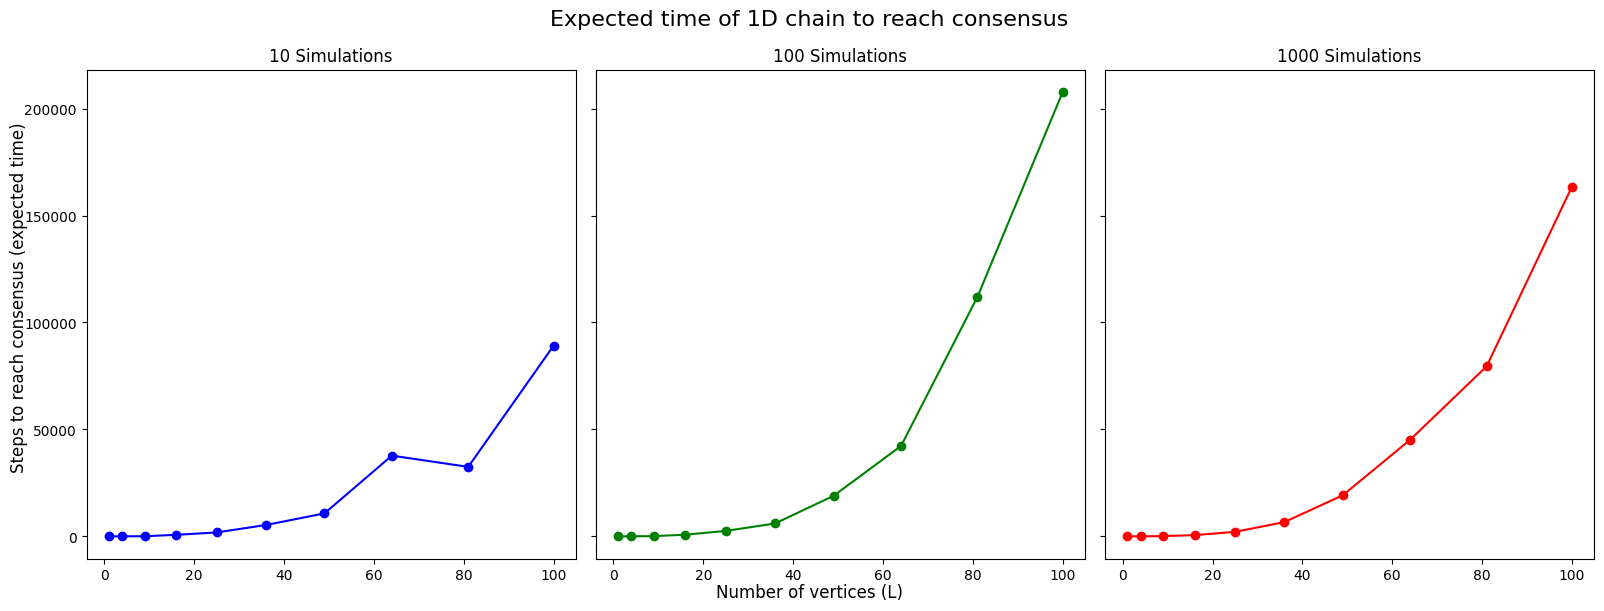

In [ ]:
x = [i**2 for i in range(1, 11)]  # Common axis for the number of simulations

fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharey=True)

# Create different plot, for each number of simulations to see the law of large number into effect
axs[0].plot(x, expected_times['expected_time_10'], color='b', marker='o')
axs[0].set_title('10 Simulations')

axs[1].plot(x, expected_times['expected_time_50'], color='g', marker='o')
axs[1].set_title('100 Simulations')

axs[2].plot(x, expected_times['expected_time_100'], color='r', marker='o')
axs[2].set_title('1000 Simulations')

# Misc
fig.suptitle('Expected time of 1D chain to reach consensus', fontsize=16)
plt.tight_layout()
fig.text(0.5, 0.0005, 'Number of vertices (L)', ha='center', fontsize=12)
fig.text(0.0005, 0.5, 'Steps to reach consensus (expected time)', va='center', rotation='vertical', fontsize=12)

### Two dimensional graph (grid)

In [ ]:
def voter_model_2d_grid(L, num_simulations):
    consensus_times = []

    for _ in range(num_simulations):
        opinions = np.random.choice([0, 1], size=(L, L))
        t = 0

        while len(set(opinions.flatten())) != 1:
            i, j = np.random.randint(0, L, size=2)  # Choose a random individual (i, j)

            neighbors = [(i + 1, j), (i - 1, j), (i, j + 1), (i, j - 1)]  # Set an array from which choosing the possible neighbors

            # Deal with the out of bound error
            while (True):
                try:
                    neighbor = np.random.choice(list(range(len(neighbors))))  # Try to choose a neighbor at random
                    opinions[i, j] = opinions[neighbors[neighbor]]  # Update opinion of voter (i, j) to match a randomly chosen neighbor
                    break  # Break if the chosen neighbor is feasible
                except IndexError:
                    continue  # Else try another of the possibile neighbors

            t += 1

        consensus_times.append(t)

    return np.mean(consensus_times)

In [ ]:
expected_times = {
    'expected_time_10': [],
    'expected_time_50': [],
    'expected_time_100': []
}

# Loop through the newly created expected_time arrays, each for a different number of simulations
for key in expected_times:
    for k in range(1, 11):
        L = k
        num_simulations = int(key.split('_')[-1])  # Take the number of simulations directly from the dictionary
        time = voter_model_2d_grid(L, num_simulations)  # Call the voter_model function
        print(f'2D Grid (L={L}, Simulations={num_simulations}): Expected Consensus Time ≈ {int(time)}')
        expected_times[key].append(time)

    print('-------------------------------------------------------------------')

2D Grid (L=1, Simulations=10): Expected Consensus Time ≈ 0
2D Grid (L=2, Simulations=10): Expected Consensus Time ≈ 3
2D Grid (L=3, Simulations=10): Expected Consensus Time ≈ 37
2D Grid (L=4, Simulations=10): Expected Consensus Time ≈ 148
2D Grid (L=5, Simulations=10): Expected Consensus Time ≈ 315
2D Grid (L=6, Simulations=10): Expected Consensus Time ≈ 1091
2D Grid (L=7, Simulations=10): Expected Consensus Time ≈ 2326
2D Grid (L=8, Simulations=10): Expected Consensus Time ≈ 2823
2D Grid (L=9, Simulations=10): Expected Consensus Time ≈ 8532
2D Grid (L=10, Simulations=10): Expected Consensus Time ≈ 10677
-------------------------------------------------------------------
2D Grid (L=1, Simulations=50): Expected Consensus Time ≈ 0
2D Grid (L=2, Simulations=50): Expected Consensus Time ≈ 5
2D Grid (L=3, Simulations=50): Expected Consensus Time ≈ 41
2D Grid (L=4, Simulations=50): Expected Consensus Time ≈ 154
2D Grid (L=5, Simulations=50): Expected Consensus Time ≈ 492
2D Grid (L=6, Simula

Text(0.0005, 0.5, 'Steps to reach consensus (expected time)')

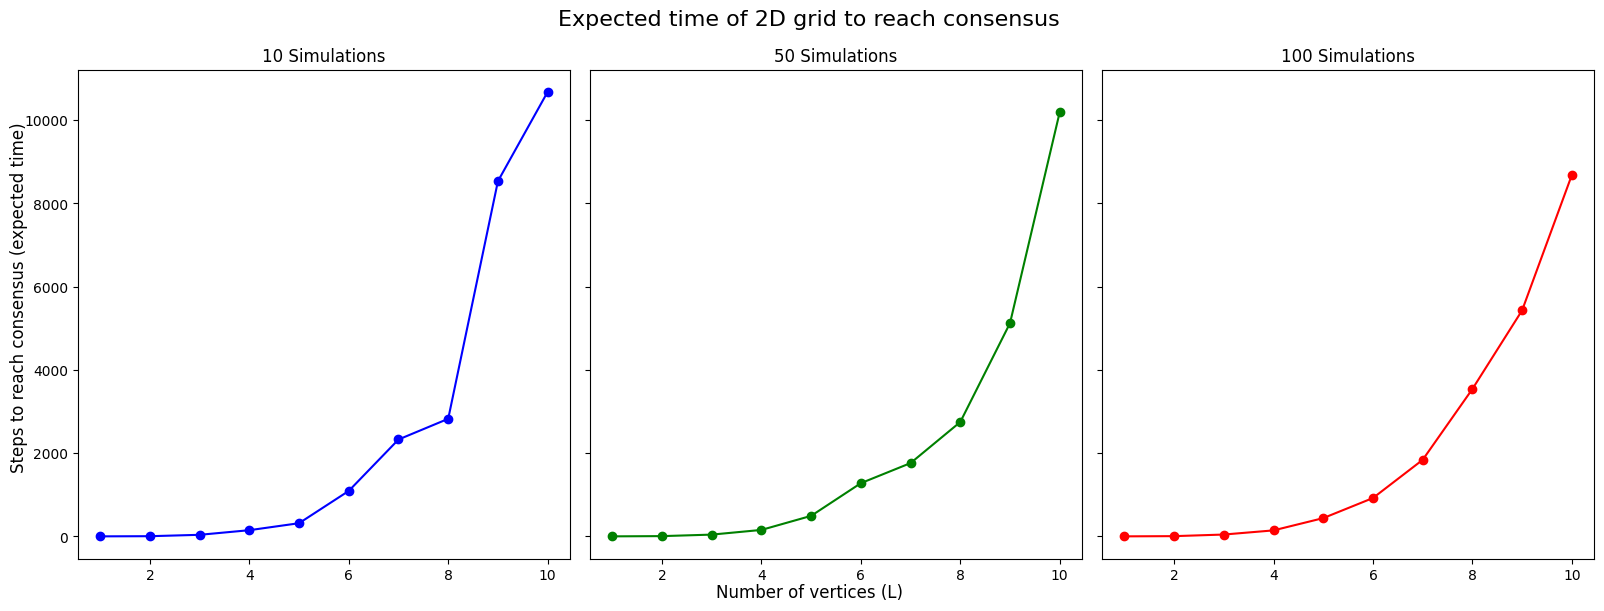

In [ ]:
x = [i for i in range(1, 11)]

fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharey=True)

axs[0].plot(x, expected_times['expected_time_10'], color='b', marker='o')
axs[0].set_title('10 Simulations')

axs[1].plot(x, expected_times['expected_time_50'], color='g', marker='o')
axs[1].set_title('50 Simulations')

axs[2].plot(x, expected_times['expected_time_100'], color='r', marker='o')
axs[2].set_title('100 Simulations')

fig.suptitle('Expected time of 2D grid to reach consensus', fontsize=16)
plt.tight_layout()
fig.text(0.5, 0.0005, 'Number of vertices (L)', ha='center', fontsize=12)
fig.text(0.0005, 0.5, 'Steps to reach consensus (expected time)', va='center', rotation='vertical', fontsize=12)